# Project 1 – Replication Project

## Contents
- [Information](#Information)
- [Data Preprocessing](#Data-Preprocessing)
- [Multiple Linear Regression](#Multiple-Linear-Regression)

## Information

The paper asks whether universal basic income or targeted cash transfers should be implemented. The paper looks at evidence from Indonesia and Peru. There are tradeoffs between the universal approach and the targeted approach. The targeted approach uses proxy measures for income (since in poor countries income data is often not available), which leads to inclusion as well as exclusion errors. Universal programs are easier to implement, but they do not specifically target the poor. Advantages of universal programs are ease of implementation and low administrative costs (no verification of income necessary). Such a universal program could be implemented through a tax system. However, in poor countries, where many people are below the tax threshold, the burden would fall on very few people. If these are particularly productive people this may have large negative consequences. On the other hand, there are targeted programs. A proxy means test is when a proxy for income is observed and households are targeted based on this. Typically large censuses are conducted with door-to-door visits asking about stuff like the assets households own. Seldomly, self-reporting and unverified income are used, since lying is very easy. The assets collected from the census are then used to predict income or consumption. The steps in which this works are the following. The government takes a dataset, which was collected in a low-stakes context such that there was no incentive to lie and takes a proxy-means census. Then a regression is estimated with poverty (income or consumption) as the dependent variable and assets as the explanatory variables. The government sets a threshold for eligibility and distributes benefits to all households with predicted incomes below the threshold. This will lead to inclusion and exclusion errors. Depending on the policy context, either a universal basic income or a targeted program may dominate the other.

For Peru, the paper focuses on the Juntos program, which is a conditional cash transfer to mothers designed to subsidize child health and education. Beneficiary households receive a monthly transfer of 100 soles (approximately $30). This program targets roughly one third of the population. For Peru, the dataset consists of household-level data from the Peruvian National Household Survey (ENAHO), for the years 2010-2011. The Peru dataset consists of 46'305 households. The dataset/survey contains a set of asset variables (72 variables) as well as a measure of actual per capita consumption.

The dataset is randomly divided into equally sized training and test sets. Then for the training set monthly household per capita consumption is regressed on the indicator variables. Next monthly per capita consumption is predicted for the test set using coefficients from the training regression. This gives the predicted per capita consumption.

In Peru households below the poverty line in Peru (about 28 percent of our sample) are targeted.

## Data Preprocessing

We begin by importing the libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib.lines as mlines
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from stargazer.stargazer import Stargazer

Next we read in the dataset and save it under data.

In [4]:
data = pd.read_csv('/users/nikolas.anic/Desktop/UZH/Master/HS2/ML for economic Analyses/Practicals/Project 1/peru_for_ml_course.csv')

We set the display option to show all rows and all columns.

In [5]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

We can take a look at the head of the data.

In [6]:
data.head()

,lnpercapitaconsumption,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,d_water_well,d_water_truck,d_water_pylon,d_water_outside,d_water_inside,d_drain_none,d_drain_river,d_drain_cesspool,d_drain_septic,d_drain_outside,d_drain_inside,d_wall_other,d_wall_woodmat,d_wall_stonemud,d_wall_quincha,d_wall_tapia,d_wall_adobe,d_wall_stonecement,d_wall_brickcement,d_roof_other,d_roof_straw,d_roof_mat,d_roof_platecane,d_roof_tile,d_roof_wood,d_roof_concrete,d_floor_other,d_floor_earth,d_floor_cement,d_floor_wood,d_floor_tile,d_floor_sheets,d_floor_parquet,d_electricity,d_telephone,d_h_educ_none,d_h_educ_pre,d_h_educ_prim,d_h_educ_sec,d_h_educ_higher_nouni,d_h_educ_higher_uni,d_h_educ_post,d_max_educ_none,d_max_educ_prim,d_max_educ_sec,d_max_educ_higher_nouni,d_max_educ_higher_uni,d_insurance_0,d_insurance_1,d_insurance_2,d_insurance_3,d_insurance_4plus,d_crowd_lessthan1,d_crowd_1to2,d_crowd_2to4,d_crowd_4to6,d_crowd_6plus,d_lux_0,d_lux_1,d_lux_2,d_lux_3,d_lux_4,d_lux_5,training,percapitaconsumption,poor,h_hhsize,id_for_matlab,hhid,lncaphat_OLS,percapitahat_OLS
0,NaN,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,NaN,0,1,1,233710511,5.246471,284.4243
1,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,1,0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,NaN,0,3,2,295508011,6.129468,522.8840
2,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,1,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,NaN,0,4,3,257600211,6.665577,878.4961
3,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1,0,0,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,NaN,1,9,4,198104311,6.088295,567.4705
4,NaN,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,NaN,1,8,5,24805311,5.008170,115.4929


We can also look at the head of the data with all columns.

In [7]:
display(data.head())

,lnpercapitaconsumption,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,d_water_well,d_water_truck,d_water_pylon,d_water_outside,d_water_inside,d_drain_none,d_drain_river,d_drain_cesspool,d_drain_septic,d_drain_outside,d_drain_inside,d_wall_other,d_wall_woodmat,d_wall_stonemud,d_wall_quincha,d_wall_tapia,d_wall_adobe,d_wall_stonecement,d_wall_brickcement,d_roof_other,d_roof_straw,d_roof_mat,d_roof_platecane,d_roof_tile,d_roof_wood,d_roof_concrete,d_floor_other,d_floor_earth,d_floor_cement,d_floor_wood,d_floor_tile,d_floor_sheets,d_floor_parquet,d_electricity,d_telephone,d_h_educ_none,d_h_educ_pre,d_h_educ_prim,d_h_educ_sec,d_h_educ_higher_nouni,d_h_educ_higher_uni,d_h_educ_post,d_max_educ_none,d_max_educ_prim,d_max_educ_sec,d_max_educ_higher_nouni,d_max_educ_higher_uni,d_insurance_0,d_insurance_1,d_insurance_2,d_insurance_3,d_insurance_4plus,d_crowd_lessthan1,d_crowd_1to2,d_crowd_2to4,d_crowd_4to6,d_crowd_6plus,d_lux_0,d_lux_1,d_lux_2,d_lux_3,d_lux_4,d_lux_5,training,percapitaconsumption,poor,h_hhsize,id_for_matlab,hhid,lncaphat_OLS,percapitahat_OLS
0,NaN,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,NaN,0,1,1,233710511,5.246471,284.4243
1,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,1,0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,NaN,0,3,2,295508011,6.129468,522.8840
2,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,1,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,NaN,0,4,3,257600211,6.665577,878.4961
3,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1,0,0,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,NaN,1,9,4,198104311,6.088295,567.4705
4,NaN,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,NaN,1,8,5,24805311,5.008170,115.4929


We can take a look at the data types.

In [8]:
data.dtypes

lnpercapitaconsumption     float64
d_fuel_other                 int64
d_fuel_wood                  int64
d_fuel_coal                  int64
d_fuel_kerosene              int64
d_fuel_gas                   int64
d_fuel_electric              int64
d_fuel_none                  int64
d_water_other                int64
d_water_river                int64
d_water_well                 int64
d_water_truck                int64
d_water_pylon                int64
d_water_outside              int64
d_water_inside               int64
d_drain_none                 int64
d_drain_river                int64
d_drain_cesspool             int64
d_drain_septic               int64
d_drain_outside              int64
d_drain_inside               int64
d_wall_other               float64
d_wall_woodmat             float64
d_wall_stonemud            float64
d_wall_quincha             float64
d_wall_tapia               float64
d_wall_adobe               float64
d_wall_stonecement         float64
d_wall_brickcement  

We get summary statistics on the columns

In [9]:
data.describe()

,lnpercapitaconsumption,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,d_water_well,d_water_truck,d_water_pylon,d_water_outside,d_water_inside,d_drain_none,d_drain_river,d_drain_cesspool,d_drain_septic,d_drain_outside,d_drain_inside,d_wall_other,d_wall_woodmat,d_wall_stonemud,d_wall_quincha,d_wall_tapia,d_wall_adobe,d_wall_stonecement,d_wall_brickcement,d_roof_other,d_roof_straw,d_roof_mat,d_roof_platecane,d_roof_tile,d_roof_wood,d_roof_concrete,d_floor_other,d_floor_earth,d_floor_cement,d_floor_wood,d_floor_tile,d_floor_sheets,d_floor_parquet,d_electricity,d_telephone,d_h_educ_none,d_h_educ_pre,d_h_educ_prim,d_h_educ_sec,d_h_educ_higher_nouni,d_h_educ_higher_uni,d_h_educ_post,d_max_educ_none,d_max_educ_prim,d_max_educ_sec,d_max_educ_higher_nouni,d_max_educ_higher_uni,d_insurance_0,d_insurance_1,d_insurance_2,d_insurance_3,d_insurance_4plus,d_crowd_lessthan1,d_crowd_1to2,d_crowd_2to4,d_crowd_4to6,d_crowd_6plus,d_lux_0,d_lux_1,d_lux_2,d_lux_3,d_lux_4,d_lux_5,training,percapitaconsumption,poor,h_hhsize,id_for_matlab,hhid,lncaphat_OLS,percapitahat_OLS
count,23153.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,46305.000000,46305.000000,46301.000000,46301.000000,46301.000000,46301.000000,46301.000000,46301.000000,46301.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,23153.000000,46305.000000,46305.000000,46305.000000,4.630500e+04,45378.000000,45378.000000
mean,5.853638,0.104244,0.307202,0.025656,0.004557,0.518734,0.007796,0.031811,0.041421,0.207947,0.040341,0.017320,0.019285,0.064291,0.609394,0.149552,0.021682,0.135730,0.155750,0.059281,0.472692,0.050483,0.113591,0.013067,0.023512,0.100304,0.299348,0.006038,0.393658,0.012009,0.071372,0.013243,0.499714,0.118571,0.013860,0.271231,0.011987,0.394121,0.404323,0.079701,0.057181,0.030364,0.022322,0.837728,0.204557,0.080689,0.000216,0.382411,0.331742,0.103000,0.088249,0.013693,0.032372,0.171234,0.405075,0.169766,0.197041,0.179117,0.163632,0.163784,0.150610,0.342857,0.300119,0.427020,0.205831,0.047882,0.019149,0.544974,0.193845,0.113703,0.067293,0.043797,0.036389,0.500011,459.015591,0.280207,4.012094,23153.000000,1.869936e+08,5.850041,459.121087
std,0.742314,0.305580,0.461339,0.158108,0.067350,0.499654,0.087952,0.175498,0.199264,0.405843,0.196760,0.130462,0.137527,0.245273,0.487891,0.356635,0.145646,0.342506,0.362622,0.236152,0.499259,0.218941,0.317318,0.113562,0.151523,0.300408,0.457977,0.077468,0.488566,0.108928,0.257448,0.114316,0.500005,0.323287,0.116912,0.444600,0.108829,0.488666,0.490766,0.270833,0.232191,0.171590,0.147729,0.368704,0.403382,0.272360,0.014695,0.485981,0.470844,0.303962,0.283659,0.116214,0.176989,0.376718,0.490912,0.375431,0.397768,0.383454,0.369946,0.370083,0.357672,0.474669,0.458315,0.494651,0.404312,0.213520,0.137049,0.497979,0.395313,0.317453,0.250531,0.204644,0.187258,0.500005,401.571900,0.449105,2.093215,13367.246444,1.111905e+08,0.605646,293.660061
min,2.110213,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

We can get some further information on our dataset.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46305 entries, 0 to 46304
Data columns (total 81 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   lnpercapitaconsumption   23153 non-null  float64
 1   d_fuel_other             46305 non-null  int64  
 2   d_fuel_wood              46305 non-null  int64  
 3   d_fuel_coal              46305 non-null  int64  
 4   d_fuel_kerosene          46305 non-null  int64  
 5   d_fuel_gas               46305 non-null  int64  
 6   d_fuel_electric          46305 non-null  int64  
 7   d_fuel_none              46305 non-null  int64  
 8   d_water_other            46305 non-null  int64  
 9   d_water_river            46305 non-null  int64  
 10  d_water_well             46305 non-null  int64  
 11  d_water_truck            46305 non-null  int64  
 12  d_water_pylon            46305 non-null  int64  
 13  d_water_outside          46305 non-null  int64  
 14  d_water_inside        

We check how many missing values there are for each column.

In [11]:
data.isna().sum()

lnpercapitaconsumption     23152
d_fuel_other                   0
d_fuel_wood                    0
d_fuel_coal                    0
d_fuel_kerosene                0
d_fuel_gas                     0
d_fuel_electric                0
d_fuel_none                    0
d_water_other                  0
d_water_river                  0
d_water_well                   0
d_water_truck                  0
d_water_pylon                  0
d_water_outside                0
d_water_inside                 0
d_drain_none                   0
d_drain_river                  0
d_drain_cesspool               0
d_drain_septic                 0
d_drain_outside                0
d_drain_inside                 0
d_wall_other                 923
d_wall_woodmat               923
d_wall_stonemud              923
d_wall_quincha               923
d_wall_tapia                 923
d_wall_adobe                 923
d_wall_stonecement           923
d_wall_brickcement           923
d_roof_other                 923
d_roof_str

We check the shape of our dataset.

In [12]:
data.shape

(46305, 81)

table presents the training regression used to predict household income (for Peru) in Figures 3-7. Omitted categories are the following dummies: 
- less than 1 household member per room; 
- 0 of 5 luxury goods owned; 
- other type of fuel used for cooking; 
- water source: other;
- drainage source: other; 
- wall type: other; 
- roof type: other; 
- floor type: other; 
- head of household has no education; 
- 0 household members affiliated to health insurance.


We drop the columns we don't need.

In [14]:
data <- data.drop(['percapitaconsumption','d_fuel_other','d_water_other','d_wall_other','d_roof_other','d_floor_other','d_insurance_0','d_crowd_lessthan1','d_lux_0','training','poor','h_hhsize','id_for_matlab','hhid','lncaphat_OLS','percapitahat_OLS'], axis = 1, inplace = True)


TypeError: bad operand type for unary -: 'NoneType'

In [15]:
data.shape

(46305, 65)

In [16]:
data.isna().sum()

lnpercapitaconsumption     23152
d_fuel_wood                    0
d_fuel_coal                    0
d_fuel_kerosene                0
d_fuel_gas                     0
d_fuel_electric                0
d_fuel_none                    0
d_water_river                  0
d_water_well                   0
d_water_truck                  0
d_water_pylon                  0
d_water_outside                0
d_water_inside                 0
d_drain_none                   0
d_drain_river                  0
d_drain_cesspool               0
d_drain_septic                 0
d_drain_outside                0
d_drain_inside                 0
d_wall_woodmat               923
d_wall_stonemud              923
d_wall_quincha               923
d_wall_tapia                 923
d_wall_adobe                 923
d_wall_stonecement           923
d_wall_brickcement           923
d_roof_straw                 923
d_roof_mat                   923
d_roof_platecane             923
d_roof_tile                  923
d_roof_woo

We drop all rows with missing values.

In [17]:
data.dropna(axis=0,inplace=True)

In [18]:
data.shape

(22674, 65)

In [19]:
data.isna().sum()

lnpercapitaconsumption     0
d_fuel_wood                0
d_fuel_coal                0
d_fuel_kerosene            0
d_fuel_gas                 0
d_fuel_electric            0
d_fuel_none                0
d_water_river              0
d_water_well               0
d_water_truck              0
d_water_pylon              0
d_water_outside            0
d_water_inside             0
d_drain_none               0
d_drain_river              0
d_drain_cesspool           0
d_drain_septic             0
d_drain_outside            0
d_drain_inside             0
d_wall_woodmat             0
d_wall_stonemud            0
d_wall_quincha             0
d_wall_tapia               0
d_wall_adobe               0
d_wall_stonecement         0
d_wall_brickcement         0
d_roof_straw               0
d_roof_mat                 0
d_roof_platecane           0
d_roof_tile                0
d_roof_wood                0
d_roof_concrete            0
d_floor_earth              0
d_floor_cement             0
d_floor_wood  

## Multiple Linear Regression

### Option 1

We set per capita consumption as the dependent variable and the rest of the columns as the explanatory variables.

In [87]:
X = data.drop(['lnpercapitaconsumption'],axis=1)
y = data['lnpercapitaconsumption']

We split the dataset into training and test sets.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

In [214]:
cons = np.array(data.lnpercapitaconsumption)
p = np.percentile(cons, 35) 
p

5.56879945

### Option 1

In [215]:
reg = sm.OLS(y_train, sm.add_constant(X_train)).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     lnpercapitaconsumption   R-squared:                       0.653
Model:                                OLS   Adj. R-squared:                  0.651
Method:                     Least Squares   F-statistic:                     336.7
Date:                    Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                            17:29:21   Log-Likelihood:                -6758.7
No. Observations:                   11337   AIC:                         1.365e+04
Df Residuals:                       11273   BIC:                         1.411e+04
Df Model:                              63                                         
Covariance Type:                nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       5.3322      0.087     61.430      0.000       5.162       5.502
d_fuel_wood                 0.0618      0.015      4.036      0.000       0.032       0.092
d_fuel_coal                 0.2457      0.031      7.954      0.000       0.185       0.306
d_fuel_kerosene             0.2798      0.063      4.449      0.000       0.157       0.403
d_fuel_gas                  0.3076      0.018     16.710      0.000       0.272       0.344
d_fuel_electric             0.7165      0.058     12.414      0.000       0.603       0.830
d_fuel_none                 0.4577      0.029     16.004      0.000       0.402       0.514
d_water_river              -0.0911      0.024     -3.857      0.000      -0.137      -0.045
d_water_well               -0.0383      0.030     -1.285      0.199      -0.097       0.020
d_water_truck               0.0875      0.038      2.279      0.023       0.012       0.163
d_water_pylon              -0.0256      0.037     -0.698      0.485      -0.098       0.046
d_water_outside             0.0600      0.039      1.539      0.124      -0.016       0.136
d_water_inside             -0.0176      0.023     -0.780      0.436      -0.062       0.027
d_drain_none               -0.1279      0.059     -2.165      0.030      -0.244      -0.012
d_drain_river              -0.0909      0.064     -1.415      0.157      -0.217       0.035
d_drain_cesspool           -0.1054      0.059     -1.791      0.073      -0.221       0.010
d_drain_septic             -0.1139      0.059     -1.932      0.053      -0.229       0.002
d_drain_outside            -0.0702      0.068     -1.039      0.299      -0.203       0.062
d_drain_inside             -0.0540      0.059     -0.920      0.358      -0.169       0.061
d_wall_woodmat              0.0514      0.024      2.154      0.031       0.005       0.098
d_wall_stonemud            -0.1589      0.041     -3.915      0.000      -0.238      -0.079
d_wall_quincha              0.0223      0.033      0.677      0.499      -0.042       0.087
d_wall_tapia               -0.1717      0.025     -6.940      0.000      -0.220      -0.123
d_wall_adobe               -0.1193      0.022     -5.408      0.000      -0.162      -0.076
d_wall_stonecement         -0.0234      0.053     -0.438      0.661      -0.128       0.081
d_wall_brickcement         -0.0328      0.024     -1.364      0.173      -0.080       0.014
d_roof_straw               -0.1199      0.044     -2.752      0.006      -0.205      -0.034
d_roof_mat                  0.0682      0.054      1.263      0.207      -0.038       0.174
d_roof_platecane            0.0131      0.040      0.329      0.742      -0.065       0.091
d_roof_tile                -0.0695      0.042     -1.654      0.098      -0.152       0.013
d_r

In [216]:
pred = reg.predict(sm.add_constant(X_test))

We plot our predictions against actual values.

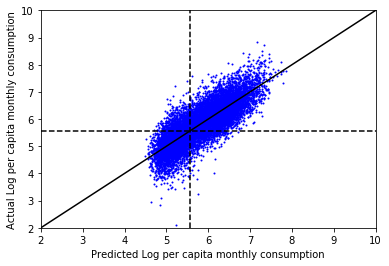

In [217]:
x, y = pred, y_test
fig, ax = plt.subplots()
ax.scatter(x, y, c='blue', s = 1)
line = mlines.Line2D([0, 1], [0, 1], color='black')
ax.axhline(y=p, color='black', linestyle='dashed')
ax.axvline(x=p, color='black', linestyle='dashed')
ax.set_xlabel('Predicted Log per capita monthly consumption')
ax.set_ylabel('Actual Log per capita monthly consumption')
axes = plt.gca()
axes.set_xlim([2,10])
axes.set_ylim([2,10])
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show()

In [218]:
X = data.drop(['lnpercapitaconsumption'],axis=1)
y = data['lnpercapitaconsumption']

In [219]:
regressor = sm.OLS(y,sm.add_constant(X)).fit()

In [220]:
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     lnpercapitaconsumption   R-squared:                       0.656
Model:                                OLS   Adj. R-squared:                  0.655
Method:                     Least Squares   F-statistic:                     683.9
Date:                    Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                            17:29:23   Log-Likelihood:                -13433.
No. Observations:                   22674   AIC:                         2.699e+04
Df Residuals:                       22610   BIC:                         2.751e+04
Df Model:                              63                                         
Covariance Type:                nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       5.3617      0.061     88.165      0.000       5.243       5.481
d_fuel_wood                 0.0643      0.011      6.041      0.000       0.043       0.085
d_fuel_coal                 0.2524      0.021     11.852      0.000       0.211       0.294
d_fuel_kerosene             0.2586      0.046      5.581      0.000       0.168       0.349
d_fuel_gas                  0.3121      0.013     24.213      0.000       0.287       0.337
d_fuel_electric             0.6475      0.037     17.689      0.000       0.576       0.719
d_fuel_none                 0.4721      0.020     23.059      0.000       0.432       0.512
d_water_river              -0.0862      0.017     -5.222      0.000      -0.119      -0.054
d_water_well               -0.0413      0.021     -1.993      0.046      -0.082      -0.001
d_water_truck               0.0996      0.027      3.691      0.000       0.047       0.152
d_water_pylon              -0.0287      0.025     -1.126      0.260      -0.079       0.021
d_water_outside             0.0591      0.028      2.145      0.032       0.005       0.113
d_water_inside             -0.0267      0.016     -1.689      0.091      -0.058       0.004
d_drain_none               -0.1486      0.042     -3.518      0.000      -0.231      -0.066
d_drain_river              -0.1111      0.046     -2.422      0.015      -0.201      -0.021
d_drain_cesspool           -0.1083      0.042     -2.575      0.010      -0.191      -0.026
d_drain_septic             -0.1279      0.042     -3.033      0.002      -0.211      -0.045
d_drain_outside            -0.0787      0.048     -1.631      0.103      -0.173       0.016
d_drain_inside             -0.0677      0.042     -1.612      0.107      -0.150       0.015
d_wall_woodmat              0.0753      0.017      4.530      0.000       0.043       0.108
d_wall_stonemud            -0.1357      0.029     -4.748      0.000      -0.192      -0.080
d_wall_quincha              0.0201      0.024      0.848      0.396      -0.026       0.067
d_wall_tapia               -0.1764      0.017    -10.142      0.000      -0.210      -0.142
d_wall_adobe               -0.1233      0.015     -7.985      0.000      -0.154      -0.093
d_wall_stonecement         -0.0533      0.040     -1.338      0.181      -0.131       0.025
d_wall_brickcement         -0.0303      0.017     -1.805      0.071      -0.063       0.003
d_roof_straw               -0.1411      0.030     -4.728      0.000      -0.200      -0.083
d_roof_mat                  0.0233      0.038      0.621      0.535      -0.050       0.097
d_roof_platecane           -0.0013      0.027     -0.047      0.963      -0.055       0.052
d_roof_tile                -0.0721      0.029     -2.503      0.012      -0.129      -0.016
d_r

### Inclusion vs. Exclusion Error

In [461]:
dat = np.array(pred)
dat2 = np.array(y_test)
df = pd.DataFrame({'Predicted_values':dat, 'Actual_values':dat2})

In [462]:
cons = np.array(data.lnpercapitaconsumption)
p = np.percentile(cons, 28) 
p

5.40828784

In [463]:
FP = df[(df['Predicted_values'] < p) & (df['Actual_values'] > p)].count()
TN_FP = df[df['Actual_values'] > p].count()
FP_ratio = FP / TN_FP
inclusion_error = FP_ratio

In [464]:
FN = df[(df['Predicted_values'] > p) & (df['Actual_values'] < p)].count()
TP_FN = df[df['Actual_values'] < p].count()
TP_ratio = FN / TP_FN
exclusion_error = TP_ratio
exclusion_error

Predicted_values    0.246506
Actual_values       0.246506
dtype: float64

In [465]:
incl_error = []
excl_error = []

Ks = 100

for i in np.arange(1,Ks, 0.1): 
    
    cons = np.array(data.lnpercapitaconsumption)
    p = np.percentile(cons, i) 
    
    FP = df[(df['Predicted_values'] < p) & (df['Actual_values'] > p)].count()
    TN_FP = df[df['Actual_values'] > p].count()
    FP_ratio = FP / TN_FP
    inclusion_error = FP_ratio
    
    FN = df[(df['Predicted_values'] > p) & (df['Actual_values'] < p)].count()
    TP_FN = df[df['Actual_values'] < p].count()
    TP_ratio = FN / TP_FN
    exclusion_error = 1 - TP_ratio
    
    incl_error.append(inclusion_error)
    excl_error.append(exclusion_error)


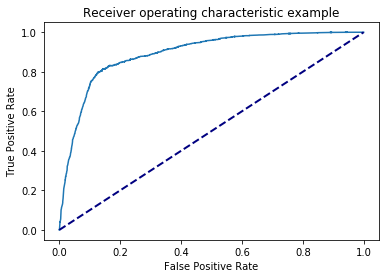

In [496]:
incl_error = np.array(incl_error)
excl_error = np.array(excl_error)

df1 = pd.DataFrame(incl_error, columns = ["inclusion_error", "false"])
df1 = df1.drop(['false'], axis=1)
df2 = pd.DataFrame(excl_error, columns = ["inclusion_error", "false"])
df2 = df2.drop(['false'], axis = 1)

lw = 2
plt.plot(df1, df2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.show()

## Benefits per HH vs. Inclusion Error

In [497]:
df2["eligible_hh"] = 274000/(df2*28710)
df2 = df2.iloc[60:,]
df2

,inclusion_error,eligible_hh
60,0.063990,149.143907
61,0.068069,140.205820
62,0.070732,134.928356
63,0.078313,121.865874
64,0.082045,116.322647
65,0.089202,106.990046
66,0.093859,101.681782
67,0.098062,97.323678
68,0.099211,96.196289
69,0.104444,91.375975


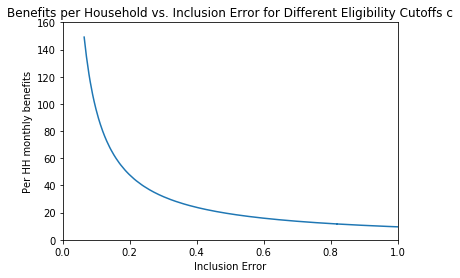

In [506]:
plt.plot(df2.inclusion_error, df2.eligible_hh)
plt.xlabel('Inclusion Error')
plt.ylabel('Per HH monthly benefits')
plt.title('Benefits per Household vs. Inclusion Error for Different Eligibility Cutoffs c')
plt.axis([0,1, 0, 160])
plt.show()

### Social Welfare vs. Inclusion Error

### Option 3

d_fuel_wood                  Household uses wood fuel for cooking 
d_fuel_coal                  Household uses coal fuel for cooking 
d_fuel_kerosene              Household uses kerosene fuel for cooking 
d_fuel_gas                   Household uses gas fuel for cooking 
d_fuel_electric              Household uses electricity for cooking 
d_fuel_none                  Household does not cook 
d_water_river                Water source: river
d_water_well                Water source: well
d_water_truck                Water source: water truck
d_water_pylon                Water source: pylon
d_water_outside              Water source: public network outside HH 
d_water_inside              Water source: public network inside HH 
d_drain_none                 Drainage source: none
d_drain_river                Drainage source: river
d_drain_cesspool            Drainage source: cesspool
d_drain_septic               Drainage source: septic tank
d_drain_outside              Drainage source: public network outside HH 
d_drain_inside               Drainage source: public network inside HH 
d_wall_woodmat             Wall type: wood or mat
d_wall_stonemud            Wall type: stone or mud
d_wall_quincha             Wall type: quincha
d_wall_tapia               Wall type: tapia (rammed earth)
d_wall_adobe               Wall type: adobe 
d_wall_stonecement         Wall type: stone with lime or cement 
d_wall_brickcement         Wall type: brick or cement block 
d_roof_straw              Roof type: straw
d_roof_mat                 Roof type: mat 
d_roof_platecane           Roof type: iron or cane 
d_roof_tile               Roof type: tile
d_roof_wood               Roof type: wood
d_roof_concrete            Roof type: concrete 
d_floor_earth              Floor type: earth 
d_floor_cement             Floor type: cement
d_floor_wood               Floor type: wood
d_floor_tile               Floor type: tile
d_floor_sheets             Floor type: sheet metal
d_floor_parquet            Floor type: parquet
d_electricity                Household has electricity
d_telephone                  Household has telephone 
d_h_educ_pre              Highest education of HH head: pre-school 
d_h_educ_prim              Highest education of HH head: primary
d_h_educ_sec              Highest education of HH head: secondary
d_h_educ_higher_nouni      Highest education of HH head: tertiary (non-univ.) 
d_h_educ_higher_uni        Highest education of HH head: tertiary (univ.) 
d_h_educ_post              Highest education of HH head: post-graduate 
d_max_educ_none              Highest education of anyone in HH: none 
d_max_educ_prim             Highest education of anyone in HH: primary
d_max_educ_sec               Highest education of anyone in HH: secondary
d_max_educ_higher_nouni     Highest education of anyone in HH: tertiary (non-univ.) 
d_max_educ_higher_uni        Highest education of anyone in HH: tertiary (univ.)
d_insurance_1                1 HH member affiliated w/ health insurance 
d_insurance_2                2 HH members affiliated w/ health insurance 
d_insurance_3                3 HH members affiliated w/ health insurance 
d_insurance_4plus            4+ HH members affiliated w/ health insurance 
d_crowd_1to2               1-2 household members per room 
d_crowd_2to4               2-4 household members per room 
d_crowd_4to6               4-6 household members per room 
d_crowd_6plus              6+ household members per room 
d_lux_1                      1 of 5 luxury goods owned
d_lux_2                      2 of 5 luxury goods owned
d_lux_3                      3 of 5 luxury goods owned
d_lux_4                      4 of 5 luxury goods owned
d_lux_5                      5 of 5 luxury goods owned